In [1]:
# pip install pythermalcomfort

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from pythermalcomfort.models import pmv_ppd

In [3]:
datos_PMV = pd.read_csv("datos_encuesta_EST.csv", index_col=0, parse_dates=True)
datos_PMV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2024-10-30 10:02:58.127000 to 2024-11-20 10:17:30.039000
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clo               124 non-null    float64
 1   e                 124 non-null    float64
 2   met               124 non-null    float64
 3   voto              124 non-null    float64
 4   Temperatura_prom  124 non-null    float64
 5   Humedad_prom      124 non-null    float64
 6   Presion_prom      124 non-null    float64
dtypes: float64(7)
memory usage: 7.8 KB


In [4]:
prueba1 = pmv_ppd(tdb=23.398480,tr=23.398480,vr=0,rh=55.424856,met=1,clo=1,standard="ASHRAE")
type(prueba1)

dict

In [5]:
#Esto es para calcular PMV con las condiciones de las encuestas, lo unico malo es que no se puede modificar la presion atmosferica

from pythermalcomfort.models import pmv_ppd

# Función para aplicar pmv_ppd y extraer PMV y PPD
def calcular_pmv_ppd(row):
    # Llama a la función pmv_ppd con los valores de la fila actual
    resultados = pmv_ppd(
        tdb=row['Temperatura_prom'],
        tr=row['Temperatura_prom'],  # Se asume que tr es igual a tdb
        vr=0,
        rh=row['Humedad_prom'],
        met=row['met'],
        clo=row['clo'],
        standard="ASHRAE"
    )
    # Devuelve los valores de PMV y PPD como un diccionario
    return pd.Series([resultados['pmv'], resultados['ppd']], index=['PMV', 'PPD'])

# Aplicar la función a cada fila del DataFrame
datos_PMV[['PMV', 'PPD']] = datos_PMV.apply(calcular_pmv_ppd, axis=1)

datos_PMV


,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD
ts,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0
...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9


In [6]:
datos_ePMV = datos_PMV.copy()
datos_ePMV

,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD
ts,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0
...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9


In [7]:
datos_ePMV['Mmod'] = datos_ePMV['met'] * (1 - 0.067 * datos_ePMV['PMV'])
datos_ePMV

,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD,Mmod
ts,,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1,0.994640
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7,1.126532
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1,1.038860
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5,1.030820
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0,0.997990
...,...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9,1.020100
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0,0.985260
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9,1.077890


In [8]:
def calcular_ePMV(row):
    # Llama a la función pmv_ppd con los valores de la fila actual y usando Mmod para met
    if row['Temperatura_prom'] < 30:
        T = row['Temperatura_prom']
    else:
        T = 29.99999
        
    resultado = pmv_ppd(
        tdb=T,
        tr=T,  # Se asume que tr es igual a tdb
        vr=0,
        rh=row['Humedad_prom'],
        met=row['Mmod'],  # Usar Mmod como met
        clo=row['clo'],
        # standard="ASHRAE"
    )
    # Devuelve solo el valor de PMV
    return resultado['pmv']

# Crear la columna Mmod si aún no existe (asegurarse de que esté presente en el DataFrame)
datos_PMV['Mmod'] = datos_PMV['met'] * (1 - 0.067 * datos_PMV['PMV'])

# Crear una copia del DataFrame original
datos_ePMV = datos_PMV.copy()

# Calcular ePMV y guardarlo en una nueva columna
datos_ePMV['ePMV'] = datos_ePMV.apply(calcular_ePMV, axis=1)*datos_ePMV['e']

# Mostrar el DataFrame actualizado
datos_ePMV

C:\Users\roele\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\np\ufunc\dufunc.py:287: RuntimeWarning: invalid value encountered in _pmv_ppd_optimized
  return super().__call__(*args, **kws)
C:\Users\roele\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\np\ufunc\dufunc.py:287: RuntimeWarning: invalid value encountered in _pmv_ppd_optimized
  return super().__call__(*args, **kws)


,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD,Mmod,ePMV
ts,,,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1,0.994640,0.042
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7,1.126532,-0.203
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1,1.038860,-0.322
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5,1.030820,-0.259
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0,0.997990,0.014
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9,1.020100,-0.175
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0,0.985260,0.112
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9,1.077890,0.182


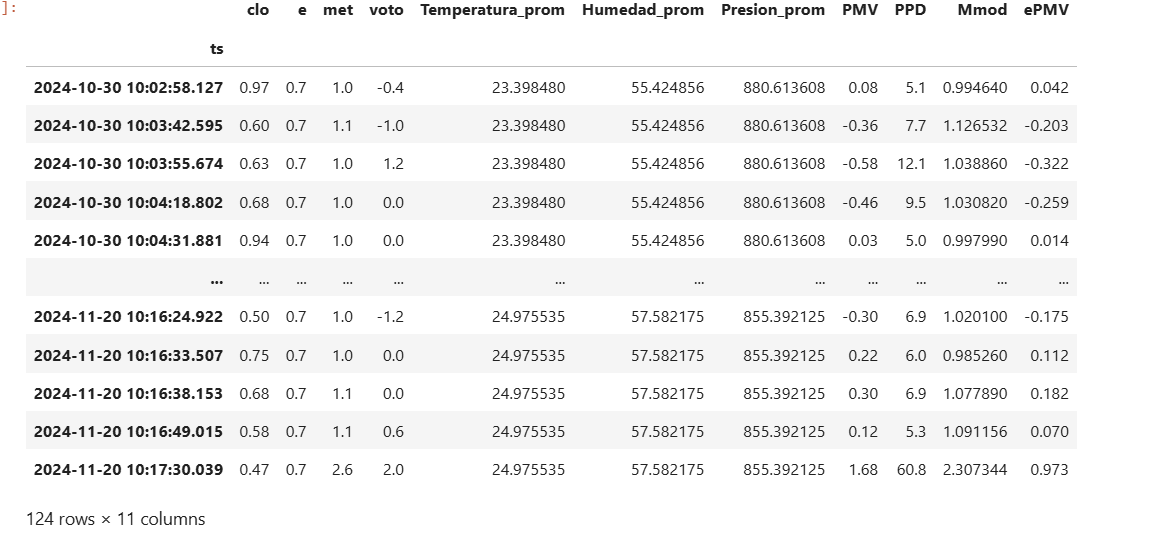

In [9]:
prueba2 = pmv_ppd(tdb=23.398480,tr=23.398480,vr=0,rh=55.424856,met=0.994640,clo=0.97)
prueba2

{'pmv': np.float64(0.06), 'ppd': np.float64(5.1)}

In [10]:
0.06*0.7

0.041999999999999996

In [11]:
# Verificar si hay valores nulos en las columnas 'voto' y 'ePMV'
print(datos_ePMV[['voto', 'ePMV', 'PMV']].isnull().sum())


voto    0
ePMV    2
PMV     2
dtype: int64


In [12]:
# Ver índices de las filas con NaN en alguna columna
indices_con_nan = datos_ePMV[datos_ePMV.PMV.isnull()].index
print(indices_con_nan)


DatetimeIndex(['2024-10-31 09:59:39.357000', '2024-11-13 10:22:24.533000'], dtype='datetime64[ns]', name='ts', freq=None)


In [13]:
datos_ePMV.loc["2024-11-13 10:22:24.533000"]

clo                   1.870000
e                     0.700000
met                   1.000000
voto                  1.000000
Temperatura_prom     25.801619
Humedad_prom         40.435614
Presion_prom        876.458078
PMV                        NaN
PPD                        NaN
Mmod                       NaN
ePMV                       NaN
Name: 2024-11-13 10:22:24.533000, dtype: float64

In [14]:
1 * (1 - 0.067 * 1.33)

0.91089

In [15]:
# Tuve que modificar algunos valores que no pueden ser calculados con la funcion pmv_ppd 
# ya que estan fuera de los rangos que aceptan las normas ASHRAE e ISO, fueron calculados 
# con https://comfort.cbe.berkeley.edu/

datos_ePMV.loc["2024-11-13 10:22:24.533000", "PMV"] = 1.33
datos_ePMV.loc["2024-11-13 10:22:24.533000", "PPD"] = 42.0
datos_ePMV.loc["2024-11-13 10:22:24.533000", "ePMV"] = 1.10 * 0.7
datos_ePMV.loc["2024-11-13 10:22:24.533000", "Mmod"] = 0.91089

# Verificar el cambi
datos_ePMV.loc["2024-11-13 10:22:24.533000"]


clo                   1.870000
e                     0.700000
met                   1.000000
voto                  1.000000
Temperatura_prom     25.801619
Humedad_prom         40.435614
Presion_prom        876.458078
PMV                   1.330000
PPD                  42.000000
Mmod                  0.910890
ePMV                  0.770000
Name: 2024-11-13 10:22:24.533000, dtype: float64

In [16]:
# Tuve que modificar algunos valores que no pueden ser calculados con la funcion pmv_ppd 
# ya que estan fuera de los rangos que aceptan las normas ASHRAE e ISO, fueron calculados 
# con https://comfort.cbe.berkeley.edu/

datos_ePMV.loc["2024-10-31 09:59:39.357000", "PMV"] = 1.27
datos_ePMV.loc["2024-10-31 09:59:39.357000", "PPD"] = 39.0
datos_ePMV.loc["2024-10-31 09:59:39.357000", "ePMV"] = 1.05 * 0.7
datos_ePMV.loc["2024-10-31 09:59:39.357000", "Mmod"] = 0.91491

# Verificar el cambi
datos_ePMV.loc["2024-10-31 09:59:39.357000"]


clo                   1.830000
e                     0.800000
met                   1.000000
voto                  1.600000
Temperatura_prom     24.935109
Humedad_prom         56.619713
Presion_prom        879.360600
PMV                   1.270000
PPD                  39.000000
Mmod                  0.914910
ePMV                  0.735000
Name: 2024-10-31 09:59:39.357000, dtype: float64

In [17]:
# Tuve que modificar algunos valores que no pueden ser calculados con la funcion pmv_ppd 
# ya que estan fuera de los rangos que aceptan las normas ASHRAE e ISO, fueron calculados 
# con https://comfort.cbe.berkeley.edu/

datos_ePMV.loc["2024-10-31 09:59:39.357000", "PMV"] = 1.27
datos_ePMV.loc["2024-10-31 09:59:39.357000", "PPD"] = 39.0
datos_ePMV.loc["2024-10-31 09:59:39.357000", "ePMV"] = 1.05 * 0.7
datos_ePMV.loc["2024-10-31 09:59:39.357000", "Mmod"] = 0.91491

# Verificar el cambi
datos_ePMV.loc["2024-10-31 09:59:39.357000"]


clo                   1.830000
e                     0.800000
met                   1.000000
voto                  1.600000
Temperatura_prom     24.935109
Humedad_prom         56.619713
Presion_prom        879.360600
PMV                   1.270000
PPD                  39.000000
Mmod                  0.914910
ePMV                  0.735000
Name: 2024-10-31 09:59:39.357000, dtype: float64

In [18]:
prueba2 = pmv_ppd(tdb=23.398480,tr=23.398480,vr=0,rh=55.424856,met=0.994640,clo=0.97)
prueba2

{'pmv': np.float64(0.06), 'ppd': np.float64(5.1)}

In [19]:
prueba3 = pmv_ppd(tdb=30.041960,tr=30.041960,vr=0,rh=44.217661,met=1,clo=0.550000, standard="ASHRAE")
prueba3

{'pmv': np.float64(1.57), 'ppd': np.float64(54.4)}

In [20]:
datos_ePMV

,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD,Mmod,ePMV
ts,,,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1,0.994640,0.042
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7,1.126532,-0.203
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1,1.038860,-0.322
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5,1.030820,-0.259
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0,0.997990,0.014
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9,1.020100,-0.175
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0,0.985260,0.112
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9,1.077890,0.182


In [21]:
# Verificar si hay valores nulos en las columnas 'voto' y 'ePMV'
print(datos_ePMV[['voto', 'ePMV', 'PMV']].isnull().sum())


voto    0
ePMV    0
PMV     0
dtype: int64


In [22]:
datos_ePMV.to_csv("datos_ePMV.csv", index=True)

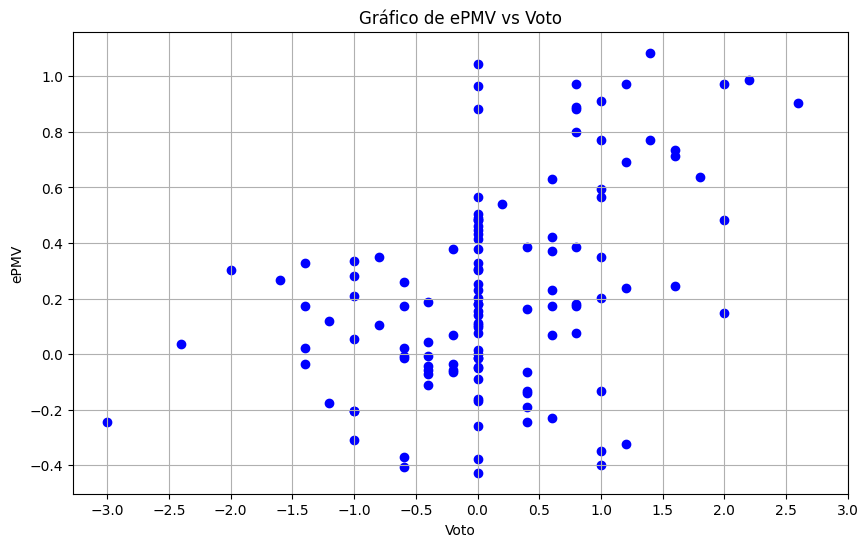

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar solo los puntos sin líneas
plt.figure(figsize=(10,6))
plt.scatter(datos_ePMV['voto'], datos_ePMV['ePMV'], color='b', marker='o')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(min(datos_ePMV['voto']), max(datos_ePMV['voto']) + 0.5, 0.5))

# Agregar títulos y etiquetas
plt.title('Gráfico de ePMV vs Voto')
plt.xlabel('Voto')
plt.ylabel('ePMV')

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [24]:
# Calcular la correlación lineal de Pearson
correlacion = datos_ePMV['voto'].corr(datos_ePMV['ePMV'])

# Imprimir el valor de la correlación
print(f'Correlación lineal (Pearson) entre voto y ePMV: {correlacion}')


Correlación lineal (Pearson) entre voto y ePMV: 0.4466061752596843


In [25]:
import numpy as np
from scipy.stats import linregress

# Datos de ejemplo
y = datos_ePMV['voto']
x = datos_ePMV['PMV']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular la incertidumbre asociada a la pendiente y a la ordenada al origen
n = len(x)  # Número de puntos
x_mean = np.mean(x)  # Media de x
std_slope = std_err  # Desviación estándar de la pendiente (ya calculada)
std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))  # Desviación estándar de la ordenada

# Imprimir los resultados
print(f"Pendiente (slope): {slope:.2f} ± {std_slope:.2f}")
print(f"Ordenada al origen (intercept): {intercept:.2f} ± {std_intercept:.2f}")
print(f"R² (Coeficiente de determinación): {r_value**2:.2f}")


Pendiente (slope): 0.65 ± 0.12
Ordenada al origen (intercept): -0.14 ± 0.01
R² (Coeficiente de determinación): 0.20


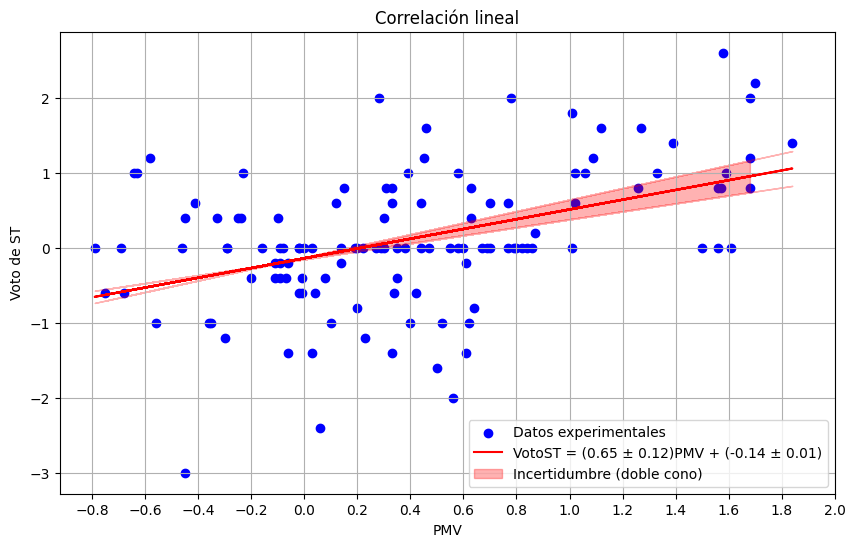

Pendiente (slope): 0.65 ± 0.12
Ordenada al origen (intercept): -0.14 ± 0.01
R² (Coeficiente de determinación): 0.20


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supongamos que ya tienes los datos en `datos_ePMV`
# Ejemplo:
y = datos_ePMV['voto']
x = datos_ePMV['PMV']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular la incertidumbre asociada a la pendiente y la ordenada al origen
n = len(x)  # Número de puntos
x_mean = np.mean(x)  # Media de x
std_slope = std_err  # Desviación estándar de la pendiente (ya calculada)
std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))  # Desviación estándar de la ordenada

# Calcular la línea de regresión para graficarla
line = slope * x + intercept

# Calcular los límites del área gris (doble cono)
lower_bound = (slope - std_slope) * x + (intercept - std_intercept)
upper_bound = (slope + std_slope) * x + (intercept + std_intercept)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', marker='o', label='Datos experimentales')
plt.plot(x, line, color='r', label=(
    f'VotoST = ({slope:.2f} ± {std_slope:.2f})PMV + ({intercept:.2f} ± {std_intercept:.2f})'))

# Agregar el área gris
plt.fill_between(x, lower_bound, upper_bound, color='red', alpha=0.3, label='Incertidumbre (doble cono)')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(round(min(x), 1), max(x) + 0.2, 0.2))

# Agregar títulos y etiquetas
plt.title('Correlación lineal')
plt.xlabel('PMV')
plt.ylabel('Voto de ST')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Imprimir los resultados de la regresión
print(f"Pendiente (slope): {slope:.2f} ± {std_slope:.2f}")
print(f"Ordenada al origen (intercept): {intercept:.2f} ± {std_intercept:.2f}")
print(f"R² (Coeficiente de determinación): {r_value**2:.2f}")

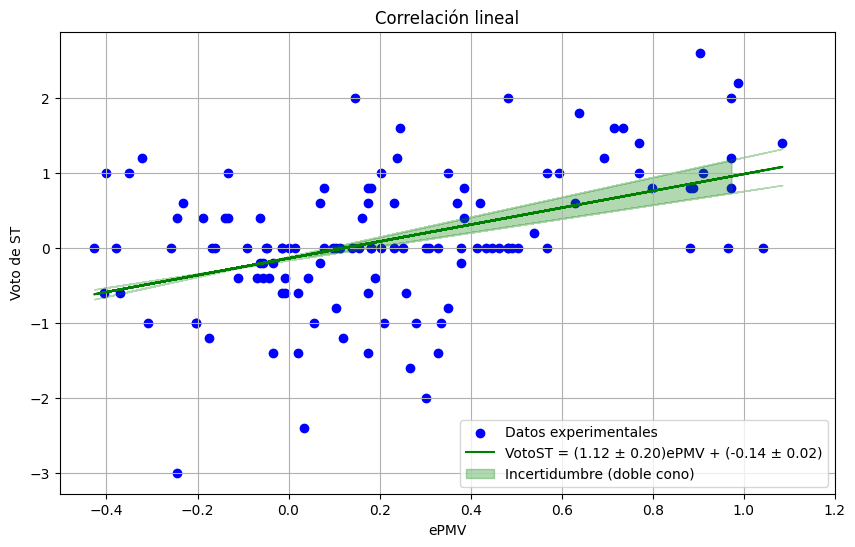

Pendiente (slope): 1.12 ± 0.20
Ordenada al origen (intercept): -0.14 ± 0.02
R² (Coeficiente de determinación): 0.20


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supongamos que ya tienes los datos en `datos_ePMV`
# Ejemplo:
y = datos_ePMV['voto']
x = datos_ePMV['ePMV']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular la incertidumbre asociada a la pendiente y la ordenada al origen
n = len(x)  # Número de puntos
x_mean = np.mean(x)  # Media de x
std_slope = std_err  # Desviación estándar de la pendiente (ya calculada)
std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))  # Desviación estándar de la ordenada

# Calcular la línea de regresión para graficarla
line = slope * x + intercept

# Calcular los límites del área gris (doble cono)
lower_bound = (slope - std_slope) * x + (intercept - std_intercept)
upper_bound = (slope + std_slope) * x + (intercept + std_intercept)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', marker='o', label='Datos experimentales')
plt.plot(x, line, color='g', label=(
    f'VotoST = ({slope:.2f} ± {std_slope:.2f})ePMV + ({intercept:.2f} ± {std_intercept:.2f})'))

# Agregar el área gris
plt.fill_between(x, lower_bound, upper_bound, color='green', alpha=0.3, label='Incertidumbre (doble cono)')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(round(min(x), 1), max(x) + 0.2, 0.2))

# Agregar títulos y etiquetas
plt.title('Correlación lineal')
plt.xlabel('ePMV')
plt.ylabel('Voto de ST')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Imprimir los resultados de la regresión
print(f"Pendiente (slope): {slope:.2f} ± {std_slope:.2f}")
print(f"Ordenada al origen (intercept): {intercept:.2f} ± {std_intercept:.2f}")
print(f"R² (Coeficiente de determinación): {r_value**2:.2f}")

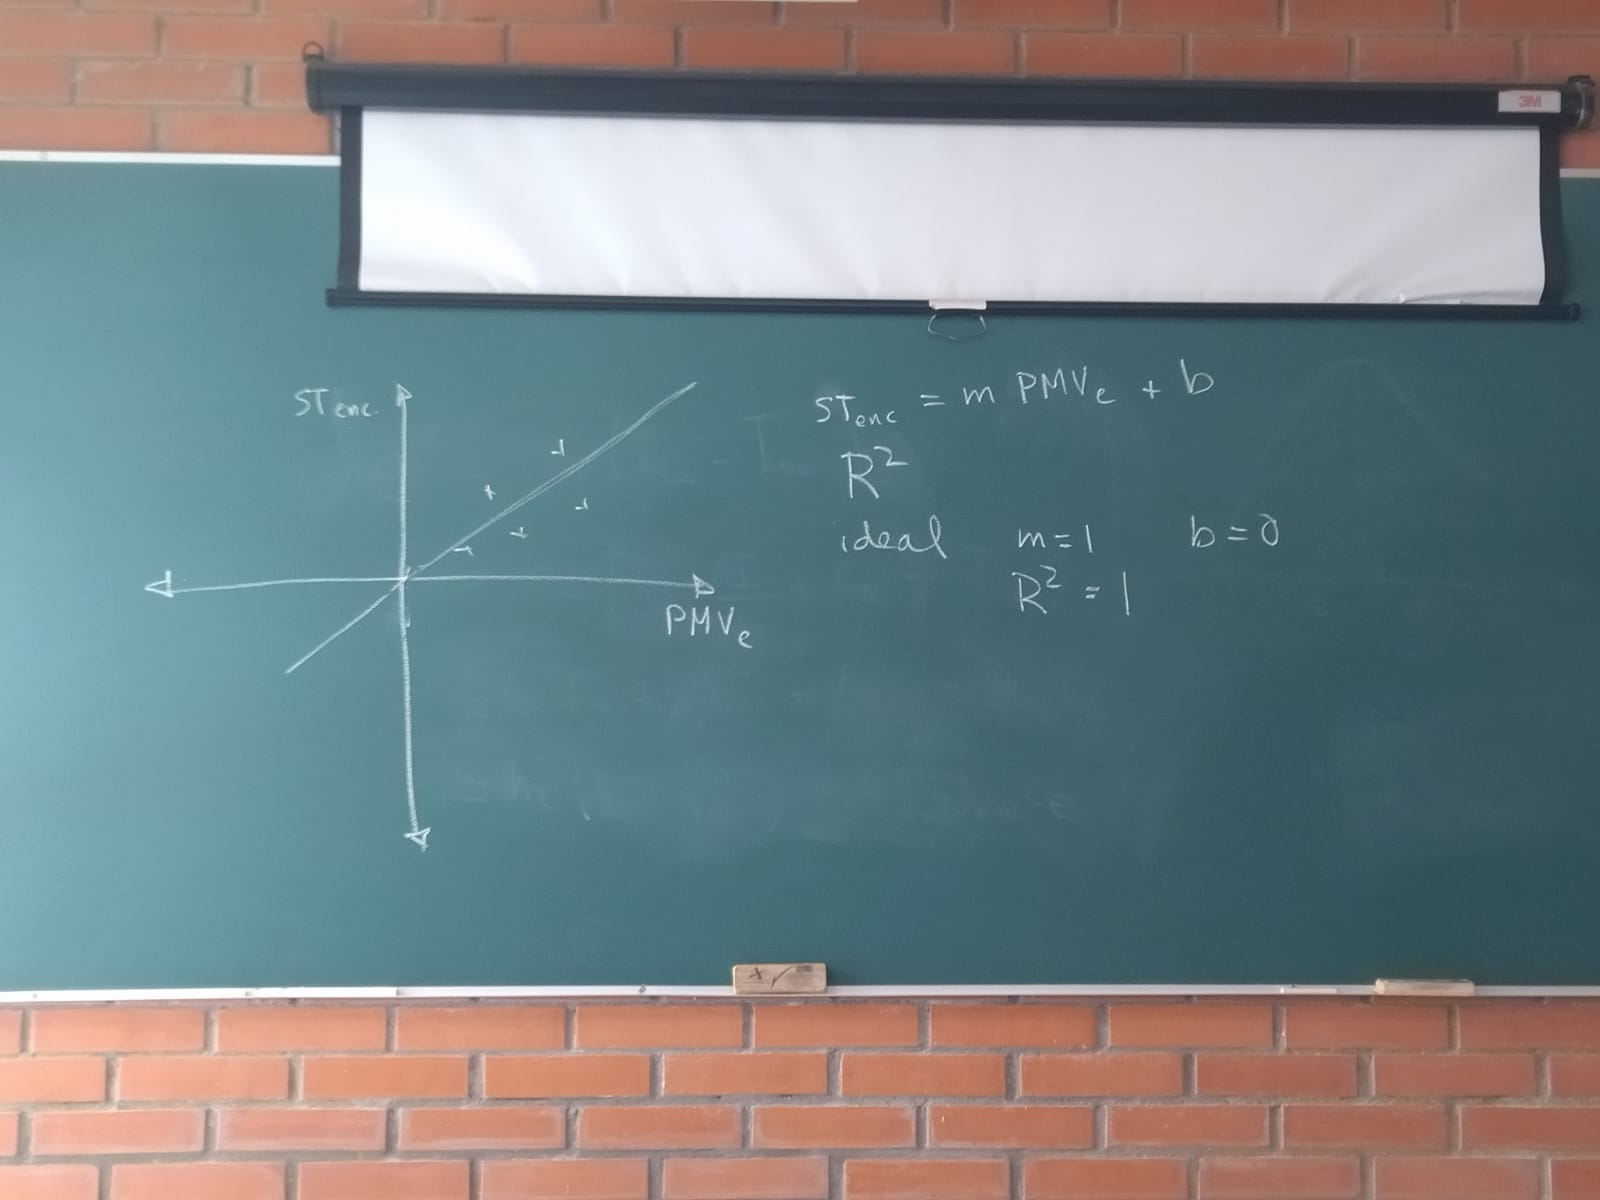